In [ ]:
http://bit.ly/2NxcW2w

## What is a Neural Network?

So what is a neural network? When most people hear of a neural network the think of some magical black box that is capable of solving very complicated problems. In reality a neural network is just a very fancy math formula, well kind of. A neural network is biologically inspired and named after the network of neurons that exist in your brain. A neural network is simply a group of connected neurons, there are some input neurons, some output neurons and a group of what we call hidden neurons in between. When we feed information to the input neurons we get some information from the output neurons. Information starts at the input neurons and travels to the next layers of neurons having whats called a weight and a bias applied to it. These weight and biases start out randomly determined and are tweaked as the network learns and sees more data. After reaching a new layer there is a function applied to each neurons value that is called an activation function.

https://techwithtim.net/wp-content/uploads/2019/05/1_3w6P6OHcU3j0T_lRUmnjQw.jpeg

Installing MatPlotLib
The last thing to install is MatPlotLib. If you are unfamiliar with matplotlib it is a python module that allows us to visualize and graph data. Install it with the pip command below:

pip install matplotlib

Installing Tensorflow 
Before we can start loading in the data that we will feed our neural network we must install tensorflow 2.0. If you are on windows it is as easy as typing the following (this is the cpu version):

pip install  tensorflow



## The Importance of Data

Data is by far the most important part of any neural network. Choosing the right data and transforming it into a form that the neural network can use and understand is vital and will affect the networks performance. This is because the data we pass the network is what it will use to modify its weights and biases!



## Keras Datasets

In these first few tutorials we will simply use some built in keras datasets which will make loading data fairly easy. The dataset we will use to start is the Fashion MNIST datset. This dataset contains 60000 images of different clothing/apparel items. The goal of our network will be to look at these images and classify them appropriately To load our first dataset in we will do the following:

https://www.tensorflow.org/beta/tutorials/keras/basic_classification

In [19]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

Now we will split our data into training and testing data. It is important that we do this so we can test the accuracy of the model on data it has not seen before.

In [20]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

Finally we will define a list of the class names and pre-process images. We do this by dividing each image by 255. Since each image is greyscale we are simply scaling the pixel values down to make computations easier for our model.

In [21]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))

60000
60000
10000


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#10 labels (0-9)
train_images = train_images/255.0
test_images = test_images/255.0
print(train_images)
print(test_images)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0

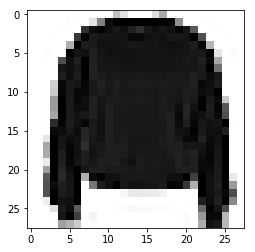

In [23]:
plt.imshow(train_images[7],cmap=plt.cm.binary)
plt.show()

In [24]:
print(train_images[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

### Creating the Model


Now time to create our first neural network model! We will do this by using the Sequential object from keras. A Sequential model simply defines a sequence of layers starting with the input layer and ending with the output layer. Our model will have 3 layers, and input layer of 784 neurons (representing all of the 28x28 pixels in a picture) a hidden layer of an arbitrary 128 neurons and an output layer of 10 neurons representing the probability of the picture being each of the 10 classes.

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

## Training the Model


Now that we have defined the model it is time to compile and train it. Compiling the model is just picking the optimizer, loss function and metrics to keep track of. Training is the process of passing our data to the model.

In [26]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.2790 - acc: 0.8975
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2662 - acc: 0.9010
Epoch 3/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2583 - acc: 0.9049
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2479 - acc: 0.9073
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.2399 - acc: 0.9100
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2283 - acc: 0.9137
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2245 - acc: 0.9165
Epoch 8/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2172 - acc: 0.9193
Epoch 9/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2108 - acc: 0.9209
Epoch 10/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2030 - acc

### Testing the Model


Now that the model has been trained it is time to test it for accuracy. We will do this using the following line of code

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/step

Test accuracy: 0.8906


## Using the Model

Now that we have trained the model it is time to actually use it! We will pick a few images from our testing data, show them on the screen and then use the model to predict what they are.

To make predictions we use our model name and .predict() passing it a list of data to predict. It is important that we understand it is used to make MULTIPLE predictions and that whatever data it is expecting mus be inside of a list. Since it is making multiple predictions it will also return to use a list of predicted values.

In [31]:
predictions = model.predict(test_images)
#print(predictions)
#print(predictions[0])
#print(np.argmax(predictions[0]))
#print(class_names[np.argmax(predictions[0])])

Now we will display the first 5 images and their predictions using matplotlib.

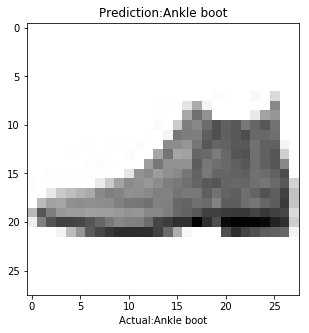

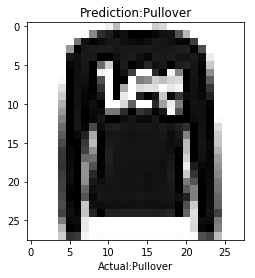

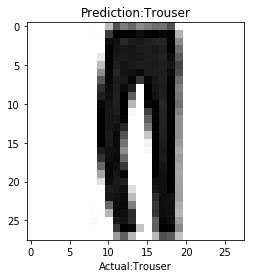

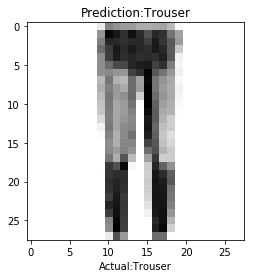

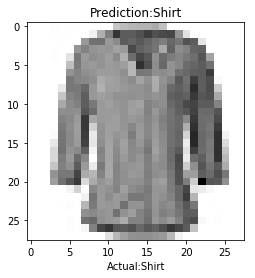

In [38]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel('Actual:'+class_names[test_labels[i]])
    plt.title('Prediction:'+ class_names[np.argmax(predictions[i])])
    plt.show()